In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset_final_project.csv") # apabila sudah pd.read tidak perlu DataFrame, karena data sudah terbaca

In [60]:
# replace untuk mengganti value
# rename untuk mengganti columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [62]:
product_types = df["Product line"].unique()
product_types

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

1

In [63]:
df["Branch"] = df["Branch"].replace(["A", "B", "C"], [1, 2, 3])
df["City"] = df["City"].replace(["Yangon", "Naypyitaw", "Mandalay"], [1, 2, 3])
df["Customer type"] = df["Customer type"].replace(["Normal", "Member"], [1, 2])
df["Product line"] = df["Product line"].replace(product_types, [4, 1, 5, 6, 3, 2]) # hasil dari .unique sudah berbentuk list jadi tidak perlu kurung siku
df["Payment"] = df["Payment"].replace(["Cash", "Credit", "Ewallet"], [1, 2, 3])

df

C:\Users\HP\AppData\Local\Temp\ipykernel_2976\4078200342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Branch"] = df["Branch"].replace(["A", "B", "C"], [1, 2, 3])
C:\Users\HP\AppData\Local\Temp\ipykernel_2976\4078200342.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["City"] = df["City"].replace(["Yangon", "Naypyitaw", "Mandalay"], [1, 2, 3])
C:\Users\HP\AppData\Local\Temp\ipykernel_2976\4078200342.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,3,2,1,Male,4,40.35,1,1/29/2019,13:46,3,6.2
996,303-96-2227,2,3,1,Female,5,97.38,10,3/2/2019,17:16,3,4.4
997,727-02-1313,1,1,2,Male,3,31.84,1,2/9/2019,13:22,1,7.7
998,347-56-2442,1,1,1,Male,5,65.82,1,2/22/2019,15:33,1,4.1


2

In [64]:
df["Total"] = df["Unit price"] * df["Quantity"]
df["Tax"] = df["Total"] * 0.05
df["Final price"] = df["Total"] - df["Tax"]

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total,Tax,Final price
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1,522.83,26.1415,496.6885
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6,76.40,3.8200,72.5800
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,Credit card,7.4,324.31,16.2155,308.0945
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4,465.76,23.2880,442.4720
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3,604.17,30.2085,573.9615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,3,2,1,Male,4,40.35,1,1/29/2019,13:46,3,6.2,40.35,2.0175,38.3325
996,303-96-2227,2,3,1,Female,5,97.38,10,3/2/2019,17:16,3,4.4,973.80,48.6900,925.1100
997,727-02-1313,1,1,2,Male,3,31.84,1,2/9/2019,13:22,1,7.7,31.84,1.5920,30.2480
998,347-56-2442,1,1,1,Male,5,65.82,1,2/22/2019,15:33,1,4.1,65.82,3.2910,62.5290


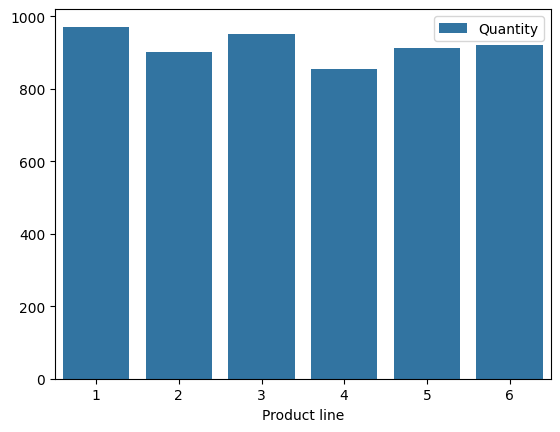

In [65]:
group_a = df.groupby("Product line")["Quantity"].sum()

sns.barplot(x = group_a.index, y = group_a.values, label = "Quantity")
plt.legend()
plt.show()

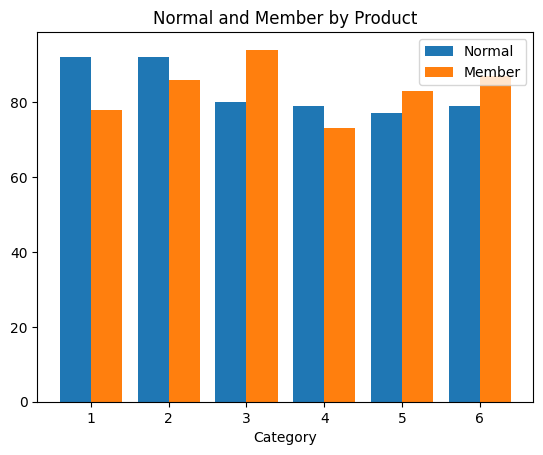

In [71]:
import numpy as np

data_normal = df.loc[df["Customer type"] == 1]
data_member = df.loc[df["Customer type"] == 2]

group_normal = data_normal.groupby("Product line")["Customer type"].count()
group_member = data_member.groupby("Product line")["Customer type"].count()

x = np.arange(len(group_normal.index))
width = 0.4

plt.bar(x - width/2, group_normal.values, width = width, label = "Normal")
plt.bar(x + width/2, group_member.values, width = width, label = "Member")

plt.title('Normal and Member by Product')
plt.xlabel('Category')
plt.xticks(x, group_normal.index)
plt.legend()
plt.show()

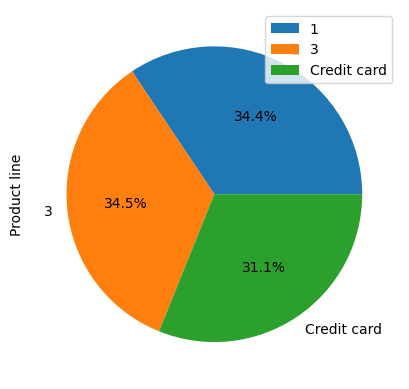

In [72]:
group_d = df.groupby("Payment")["Product line"].count()

plt.pie(group_d.values, labels = group_d.index, autopct="%1.1f%%")

plt.ylabel("Product line")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

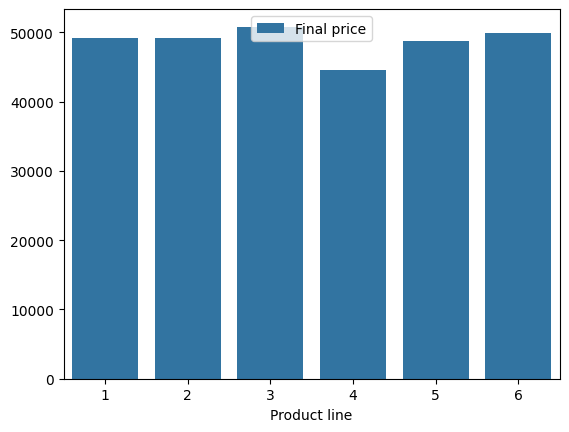

In [73]:
group_e = df.groupby("Product line")["Final price"].sum()

sns.barplot(x = group_e.index, y = group_e.values, label = "Final price")
plt.legend()
plt.show